# Descriptive statistics in R. Example
## Numeric data example
**Task 1.** Data of blood *Glucose level* and *body weight* are given as a table below.
1. Calculate the mean, median and mode.
2. Estimate dispersion of the samples (calculate range and standard deviation). Calculate standard error.
3. Check if the samples follow a normal distribution.
4. Calculate confidence intervals for the sample means and interpret results. 

Glucose level|Body weight
-|-
4|70
6|72
6|90
2|80
2|102
4|92
5|94
4|81
4|78
6|84
6|100
7|90
7|93
3|83
3|81
3|72
3|69
2|72
2|68
2|120
4|108
3|97
3|82
2|93

### 1.	Define the type of the variables
Because the variables have infinite values spectra then they’re the numeric type.

### 2.	Prepare the data to get into R. Watch the video how to import data in Google Sheet - https://youtu.be/sy-j-sqd0t8
After the data has been successfully imported use commands as shown below:

In [1]:
Input = ("Glucose level	Body weight
4	70
6	72
6	90
2	80
2	102
4	92
5	94
4	81
4	78
6	84
6	100
7	90
7	93
3	83
3	81
3	72
3	69
2	72
2	68
2	120
4	108
3	97
3	82
2	93")
DF = as.data.frame(read.table(textConnection(Input), header = TRUE, sep = "\t"))

This will allow you to work with data from the single variable of type data.frame. To access specific variable in the data.frame use the `$` sign. For example, to get the *Glucose level* one have to use `DF$Glucose.level`

Alternatively, one can construct data frame from the column vectors by using commands:

`glucose_lvl <- c(4,6,6,2,2,4,5,4,4,6,6,7,7,3,3,3,3,2,2,2,4,3,3,2)`

`body_weight <- c(70,72,90,80,102,92,94,81,78,84,100,90,93,83,81,72,69,72,68,120,108,97,82,93)`

`DF = data.frame(Glucose.lvl = glucose_lvl, Body.weight = body_weight)`

### 2.	Calculate mean, median, mode
To get the *mean* one has to use command `mean`


In [2]:
mean(DF$Glucose.level)

[1] 3.875

In [3]:
mean(DF$Body.weight)

[1] 86.29167

*Median* can be calculated by use of command `median`

In [4]:
median(DF$Glucose.level)

[1] 3.5

In [5]:
median(DF$Body.weight)

[1] 83.5

*Mode* can be obtained in two ways: 
- through the `table` command
- via the use of `Mode` command from the `DescTools` library

In [6]:
table(DF$Glucose.level)


2 3 4 5 6 7 
6 6 5 1 4 2 

As one can see there are two values that has the max frequency of 6 which means variable *Glucose level* has 2 modes: 2, 3.

In [7]:
library(DescTools)	# This command can be executed only once to get the needed functions

Warning message:
"package 'DescTools' was built under R version 3.6.3"

In [8]:
Mode(DF$Glucose.level)

[1] 2 3
attr(,"freq")
[1] 6

As you can see we’ve got the same result with a different function. It’s up to the reader (you) to obtain the mode(s) for the *Body weight* variable.

### 3.	Calculate range, standard deviation, variance, standard error of mean, standard error of median
To get *range* one has to subtract the minimum value (min) of a variable from its maximum value (max).

In [9]:
max(DF$Glucose.level) - min(DF$Glucose.level)

[1] 5

Alternatively *range* can be obtained via the `Range` function from the `DescTools` library.

In [10]:
Range(DF$Glucose.level)

[1] 5
attr(,"bounds")
[1] 2 7

*Standard deviation* is being calculated through the `sd` function

In [11]:
sd(DF$Glucose.level)

[1] 1.676241

In [12]:
sd(DF$Body.weight)

[1] 13.31387

*Variance* can be calculated through the `var` function

In [13]:
var(DF$Glucose.level)

[1] 2.809783

In [14]:
var(DF$Body.weight)

[1] 177.2591

*Standard error of mean* can be obtained in two ways: 
1.	Manually by combining in expression the standard deviation (sd), square root (sqrt) and sample size (length) calculation functions

In [15]:
sd(DF$Glucose.level) / sqrt(length(DF$Glucose.level))

[1] 0.3421612

2.	Using `MeanSE` function from the `DescTools` library

In [16]:
DescTools::MeanSE(DF$Glucose.level)

[1] 0.3421612

The way the `MeanSE` function is being called in this example is just another way of telling `R` that you wish to use specific function from the specific library. But it’s not mandatory and you could safely use the short form: `MeanSE(DF$Glucose.level)` and it would still provide you with the correct result.

In [17]:
MeanSE(DF$Glucose.level)

[1] 0.3421612

### 4.	Calculate confidence intervals of mean, confidence intervals of median
*Confidence interval of mean* can be calculated in two ways:
1.	From one sample t-test

In [18]:
t.test(DF$Body.weight)$conf.int

[1] 80.66971 91.91362
attr(,"conf.level")
[1] 0.95

Lower (or left) bound of confidence interval of mean is the first value (80.67 in this example). Upper (or right) bound of confidence interval of mean is the second value (91.91 in this example). The confidence level is 95% (0.95).

2.	From `MeanCI` function of `DescTools` library

In [19]:
MeanCI(DF$Body.weight)

mean   lwr.ci   upr.ci 
86.29167 80.66971 91.91362

`lwr.ci` is a lower (or left) bound of the *confidence interval of mean*.

`upr.ci` is an upper (or right) bound of the *confidence interval of mean*. 

The default *confidence level* for the `MeanCI` function is 0.95.

*Confidence interval of median* can be obtained by `MedianCI` function from `DescTools` library

In [20]:
MedianCI(DF$Glucose.level)

median lwr.ci upr.ci 
   3.5    3.0    5.0 
attr(,"conf.level")
[1] 0.9773442

`lwr.ci` is a lower (or left) bound of the *confidence interval of median*.

`upr.ci` is an upper (or right) bound of the confidence interval of median.

The default *confidence level* for the `MedianCI` function is 0.95.

### 5.	Check if the samples follow normal distribution
To check if sample follows the normal distribution one has to apply the Shapiro-Wilk test. It can be done via the `shapiro.test` function. If the sample follows normal distribution, then the Shapiro-Wilk test will give *p-value* greater than the *significance level* of 0.05. If the opposite is true, then the sample doesn’t follow the normal distribution.

In [21]:
shapiro.test(DF$Glucose.level)


	Shapiro-Wilk normality test

data:  DF$Glucose.level
W = 0.87708, p-value = 0.007263


As we can see *Glucose level* variable doesn’t follow normal distribution because it’s *p-value* is lower than the *significance level* of 0.05. We can confirm this by plotting the histogram of the *Glucose level* variable. To do so we have to use `hist` function. Result of the function is presented on the figure below.

`hist(DF$Glucose.lvl, main = "Glucose level", xlab = "Value")`

`main = “Glucose level”` – title of the histogram plot

`xlab = “Value”` – title of the horizontal axis 

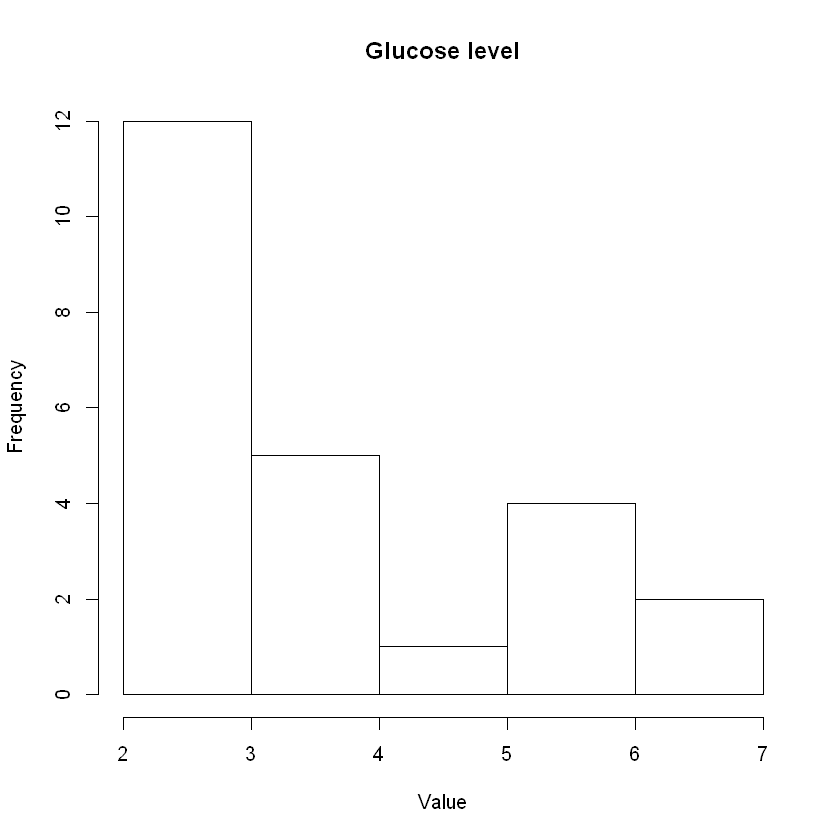

In [22]:
hist(DF$Glucose.level, main = "Glucose level", xlab = "Value")

For the *Body weight* we have the opposite case.

In [23]:
shapiro.test(DF$Body.weight)


	Shapiro-Wilk normality test

data:  DF$Body.weight
W = 0.95007, p-value = 0.2719


As one can see the *Body weight’s* *p-value* exceeds the *significance level* of 0.05 which means *Body weight* variable follows the normal distribution. The histogram of the *Body weight* variable is plotted below.

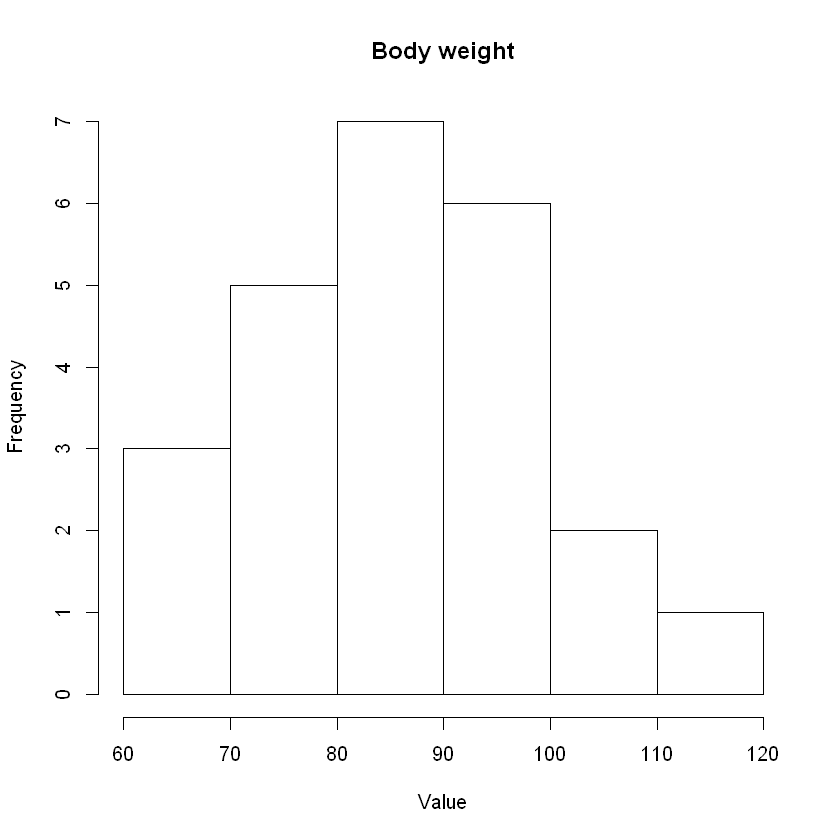

In [24]:
hist(DF$Body.weight, main = "Body weight", xlab = "Value")

### 6.	Gathering the results

We should garner the results in a table. To do so we could have stored the results in a separate variables (the preferred way) or we can produce an expression which combines all of the required functions.

R variable `gl_summary` will hold the calculation results for the *Glucose level*:

In [25]:
gl_summary <- list(
	Name = "Glucose level",
	Size = length(DF$Glucose.level), 
	Min = min(DF$Glucose.level), Max = max(DF$Glucose.level),
	Mean = mean(DF$Glucose.level), 
	Median = median(DF$Glucose.level), 
	SD = sd(DF$Glucose.level), Var = var(DF$Glucose.level),
	SEM = DescTools::MeanSE(DF$Glucose.level), 
	lwr.CI = t.test(DF$Glucose.level)$conf.int[1],
	upr.CI = t.test(DF$Glucose.level)$conf.int[2]
)

Variable *gl_summary* is a list of pairs `tag = value`. *Tag* serves only as a name for the *value* and doesn’t affect calculations, but instead one can address the specific value by its tag.

R variable `bw_summary` will hold the calculation results for the *Body weight*:

In [26]:
bw_summary <- list(
	Name = "Body weight", 
	Size = length(DF$Body.weight), 
	Min = min(DF$Body.weight), 
	Max = max(DF$Body.weight), 
	Mean = mean(DF$Body.weight), 
	Median = median(DF$Body.weight), 
	SD = sd(DF$Body.weight), Var = var(DF$Body.weight),
	SEM = DescTools::MeanSE(DF$Body.weight), 
	lwr.CI = t.test(DF$Body.weight)$conf.int[1],
	upr.CI = t.test(DF$Body.weight)$conf.int[2]
)

Final data frame to hold the calculation results is done through the merge of the above variables. During the merge process both variable can be treated either as rows or columns. To merge the variables as rows one has to use `rbind` function. To merge the variables as columns (preferred method) one has to use `cbind` function.

In [27]:
rbind(gl_summary,bw_summary)

,Name,Size,Min,Max,Mean,Median,SD,Var,SEM,lwr.CI,upr.CI
gl_summary,Glucose level,24,2,7,3.875,3.5,1.676241,2.809783,0.3421612,3.167186,4.582814
bw_summary,Body weight,24,68,120,86.29167,83.5,13.31387,177.2591,2.717682,80.66971,91.91362


In [28]:
cbind(gl_summary,bw_summary)

,gl_summary,bw_summary
Name,Glucose level,Body weight
Size,24,24
Min,2,68
Max,7,120
Mean,3.875,86.29167
Median,3.5,83.5
SD,1.676241,13.31387
Var,2.809783,177.2591
SEM,0.3421612,2.717682
lwr.CI,3.167186,80.66971


Store your calculations as a data frame

In [29]:
DF_Summary = as.data.frame(cbind(gl_summary, bw_summary))

Now you can access the specific value by addressing it through the `$` sign. For example, to get the upper CI for the Body weight one has to execute `DF_Summary$bw_summary$upr.CI`

In [30]:
DF_Summary$bw_summary$upr.CI

[1] 91.91362

### Conclusion:
*Glucose level* lies in range of values of [2; 7] with a 95% confidence interval of mean [3.16; 4.58] and doesn’t follow normal distribution. Median value of *Glucose level* is 3.875. Standard error of 
mean is almost 10 times lower of the mean value which evidences about sample being representative to the population. *Body weight* follows normal distribution and its values belong to the range of [68; 120] with the 95% confidence interval of mean [80.67; 91.91]. Standard error of mean for the *Body weight* variable is approximately 40 times lower than the mean value which points to the fact of a given sample being representative to its population.